<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/Dicoding_Submission_Intermediate_TimeSeries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/raw_sales.csv')

df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [ ]:
df.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [ ]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


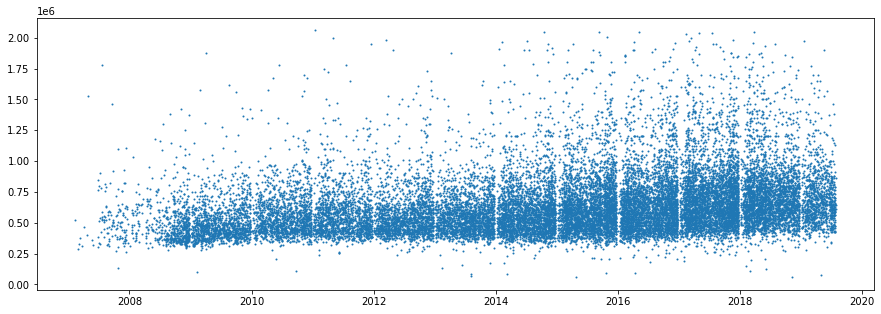

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df=df[df['propertyType']=='house'] #pilih kategori rumah saja
df=df[df.bedrooms>=1] #pilih rumah yang memiliki kamar saja 
dx=df.drop(columns=['postcode', 'propertyType','bedrooms'])
dx['datesold'] = pd.to_datetime(dx['datesold'])
dx = dx[np.abs(dx.price - dx.price.mean()) <= (5.0 * dx.price.std())]# bersihkan outlier supaya tidak bias/skewed mean

%matplotlib inline 
plt.figure(figsize=(15,5))
plt.plot_date(dx['datesold'], dx['price'], xdate=True, markersize=1)

In [ ]:
dx

,datesold,price
0,2007-02-07,525000
1,2007-02-27,290000
2,2007-03-07,328000
3,2007-03-09,380000
4,2007-03-21,310000
...,...,...
24547,2019-07-26,610000
24548,2019-07-26,657500
24549,2019-07-27,610000
24550,2019-07-27,647500


In [ ]:
dx = dx.set_index('datesold')
dx.head()

,price
datesold,
2007-02-07,525000
2007-02-27,290000
2007-03-07,328000
2007-03-09,380000
2007-03-21,310000


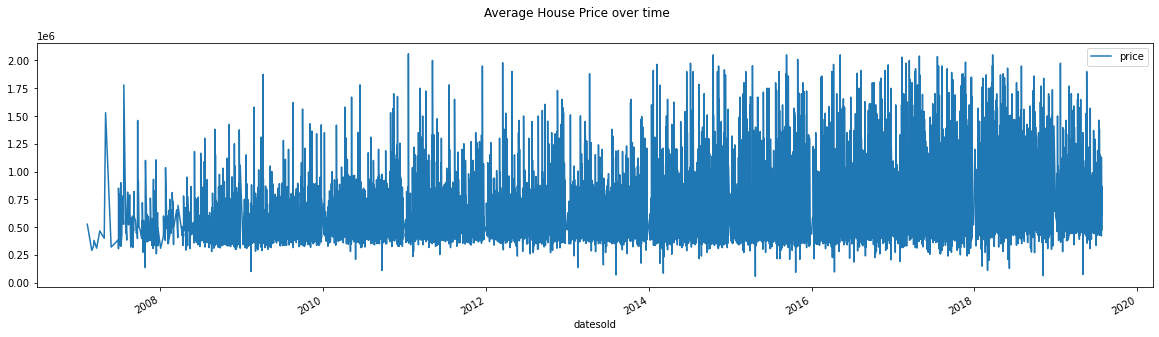

In [ ]:
dx.plot(subplots=True, kind='line', figsize=(20, 5), title='Average House Price over time', y='price')
plt.show()

In [ ]:
date = dx.index.values
price = dx.iloc[:,-1].values

In [ ]:
date

array(['2007-02-07T00:00:00.000000000', '2007-02-27T00:00:00.000000000',
       '2007-03-07T00:00:00.000000000', ...,
       '2019-07-27T00:00:00.000000000', '2019-07-27T00:00:00.000000000',
       '2019-07-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
price

array([525000, 290000, 328000, ..., 610000, 647500, 865000])

In [ ]:
print("Min:", np.min(price))
print("Max:", np.max(price))

Min: 56500
Max: 2060000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
re_price = price.reshape(-1, 1)
re_date = date.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(re_price)
scaled_data.shape, re_date.shape

((24425, 1), (24425, 1))

In [ ]:
print("Min:", np.min(scaled_data))
print("Max:", np.max(scaled_data))

Min: 0.0
Max: 1.0


In [ ]:
scaled_data

array([[0.23384078],
       [0.11654604],
       [0.13551285],
       ...,
       [0.27626653],
       [0.29498378],
       [0.4035438 ]])

In [ ]:
re_date

array([['2007-02-07T00:00:00.000000000'],
       ['2007-02-27T00:00:00.000000000'],
       ['2007-03-07T00:00:00.000000000'],
       ...,
       ['2019-07-27T00:00:00.000000000'],
       ['2019-07-27T00:00:00.000000000'],
       ['2019-07-27T00:00:00.000000000']], dtype='datetime64[ns]')

In [ ]:
from sklearn.model_selection import train_test_split
date_train, date_test, price_train, price_test = train_test_split(re_date, scaled_data, test_size=0.2)

In [ ]:
print(date_train.shape)
print(date_test.shape)
print(price_train.shape)
print(price_test.shape)

(19540, 1)
(4885, 1)
(19540, 1)
(4885, 1)


In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
data_train = windowed_dataset(price_train, window_size=60, batch_size=256, shuffle_buffer=1000)
data_test = windowed_dataset(price_test, window_size=60, batch_size=256, shuffle_buffer=1000)

In [ ]:
data_train

<PrefetchDataset shapes: ((None, None, 1, 1), (None, None, 1, 1)), types: (tf.float64, tf.float64)>

In [ ]:
data_test

<PrefetchDataset shapes: ((None, None, 1, 1), (None, None, 1, 1)), types: (tf.float64, tf.float64)>

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation="relu",input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),

])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          192       
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 64)          24832     
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_24 (Dense)             (None, 30)                990       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 38,751
Trainable params: 38,751
Non-trainable params: 0
__________________________________________________

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])

In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=1, verbose=1)
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       min_lr=1e-6,
                                       patience=2,
                                       verbose=1)

In [ ]:
history = model.fit(data_train, epochs=30,validation_data=(data_test), batch_size=256, verbose=1, callbacks=[callback_early_stopping,callback_reduce_lr])

Epoch 1/30
77/77 [==============================] - 16s 207ms/step - loss: 0.0445 - mae: 0.2727 - val_loss: 0.0368 - val_mae: 0.2423
Epoch 2/30
77/77 [==============================] - 15s 200ms/step - loss: 0.0313 - mae: 0.2201 - val_loss: 0.0282 - val_mae: 0.2040
Epoch 3/30
77/77 [==============================] - 15s 200ms/step - loss: 0.0245 - mae: 0.1865 - val_loss: 0.0225 - val_mae: 0.1739
Epoch 4/30
77/77 [==============================] - 15s 197ms/step - loss: 0.0197 - mae: 0.1590 - val_loss: 0.0184 - val_mae: 0.1489
Epoch 5/30
77/77 [==============================] - 15s 196ms/step - loss: 0.0162 - mae: 0.1363 - val_loss: 0.0154 - val_mae: 0.1285
Epoch 6/30
77/77 [==============================] - 15s 189ms/step - loss: 0.0137 - mae: 0.1185 - val_loss: 0.0132 - val_mae: 0.1133
Epoch 7/30
77/77 [==============================] - 14s 188ms/step - loss: 0.0118 - mae: 0.1058 - val_loss: 0.0116 - val_mae: 0.1026
Epoch 8/30
77/77 [==============================] - 14s 188ms/step - 

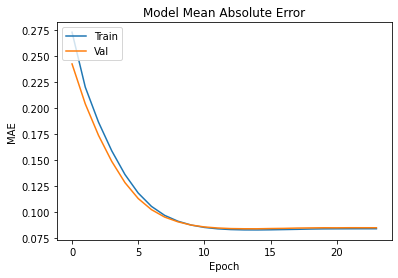

In [ ]:
#Visualize the model accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

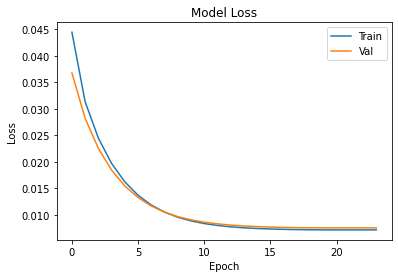

In [ ]:
#Visualize the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()